# **StackOverFlow Developer Survey 2023**

StackOverflow is one of the most popular developer websites that allows one to ask questions and get answers on a large range of computer sciensy questions.

The Stack Overflow Developer Survey is an annual survey conducted by Stack Overflow, a popular online community for developers, where programmers from around the world share their knowledge and expertise. The survey is one of the largest and most comprehensive surveys of people who code.

The main purpose of the Stack Overflow Developer Survey is to gather insights into various aspects of the software development industry, including programming languages, technologies, tools, salaries, job satisfaction, developer demographics, and more. The survey covers a wide range of topics relevant to developers, and the results provide valuable information for developers, employers, recruiters, educators, and other stakeholders in the tech industry.

Stack Overflow typically releases the results of the survey publicly, making them freely available for analysis and interpretation by the broader developer community. The survey results are often used by software companies, hiring managers, educators, and policymakers to understand trends in the developer ecosystem, inform decision-making, and improve practices related to software development and technology.

Overall, the Stack Overflow Developer Survey serves as a valuable resource for understanding the state of the software development industry, tracking changes over time, and identifying emerging trends and challenges.

This year, they went deep into AI/ML to capture how developers are thinking about it and using it in their workflows. Stack Overflow is investing heavily in enhancing the developer experience across our products, using AI and other technology, to get people to solutions faster.

We will focus on the questions that pertain to AI/ML and how developers are using these new GPTs to improve their work.

You can read more about this survey at:

https://survey.stackoverflow.co/2023/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
%pylab inline
import plotly.express as px

Populating the interactive namespace from numpy and matplotlib


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/dataAnalytics24/coding_exercises/stack_overflow_23/survey_results_public.csv.zip')

In [ ]:
df.shape

(89184, 84)

We have 84 features on 89,184 individuals from 185 countries.

The shared stack_over_flow_23 folder has three files:

1. A file that shows the survey instrument.
2. The survey schema (data dictionary)
3. Data file

**Task 1**

Our first task is to identify the columns that are relevant to our focus area and read them into a dataframe.

['MainBranch', 'Age', 'RemoteWork', 'CodingActivities', 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Country', 'Currency', 'CompTotal', 'MiscTechHaveWorkedWith', 'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'SOAI', 'AISelect', 'AISent', 'AIAcc', 'AIBen', 'AIToolInterested in Using', 'AIToolCurrentlyUsing', 'AIToolNotInterested in Using', 'AINextVeryDifferent', 'AINextNeither different nor Similar', 'AINextSomewhat similar', 'AINextVery similar', AINextSomewhat different', 'WorkExp', 'Industry', 'ConvertedCompYearly']

In [ ]:
filepath = '/content/drive/Shareddrives/dataAnalytics24/coding_exercises/stack_overflow_23/survey_results_public.csv.zip'

df = pd.read_csv(filepath,
                 usecols= ['MainBranch', 'Age', 'RemoteWork', 'CodingActivities', 'EdLevel', 'YearsCode',
                           'YearsCodePro', 'DevType', 'OrgSize', 'Country', 'Currency', 'CompTotal',
                           'MiscTechHaveWorkedWith', 'AISearchHaveWorkedWith', 'AISearchWantToWorkWith',
                           'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'SOAI', 'AISelect', 'AISent',
                           'AIAcc', 'AIBen', 'AIToolInterested in Using', 'AIToolCurrently Using',
                           'AIToolNot interested in Using', 'AINextVery different', 'AINextNeither different nor similar',
                           'AINextSomewhat similar', 'AINextVery similar',
                           'AINextSomewhat different', 'WorkExp', 'Industry', 'ConvertedCompYearly'])

In [ ]:
df.memory_usage(deep=True).sum()/1000_000

174.54307

In [ ]:
!pip install pandas==2.0

# **Use pandas 2.0 with pyarrow backend**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
pd.__version__

'2.0.0'

In [ ]:
filepath =  '/content/drive/Shareddrives/dataAnalytics24/coding_exercises/stack_overflow_23/survey_results_public.csv.zip'
df = pd.read_csv(filepath,
                 usecols= ['MainBranch', 'Age', 'RemoteWork', 'CodingActivities', 'EdLevel', 'YearsCode',
                           'YearsCodePro', 'DevType', 'OrgSize', 'Country', 'Currency', 'CompTotal',
                           'MiscTechHaveWorkedWith', 'AISearchHaveWorkedWith', 'AISearchWantToWorkWith',
                           'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'SOAI', 'AISelect', 'AISent',
                           'AIAcc', 'AIBen', 'AIToolInterested in Using', 'AIToolCurrently Using',
                           'AIToolNot interested in Using', 'AINextVery different', 'AINextNeither different nor similar',
                           'AINextSomewhat similar', 'AINextVery similar',
                           'AINextSomewhat different', 'WorkExp', 'Industry', 'ConvertedCompYearly'],
                            dtype_backend='pyarrow')

In [ ]:
df.memory_usage(deep=True).sum()/1000_000

56.839268

**The dataframe is taking 1/3rd of memory compared with using a numpy backend!!!**

In [ ]:
df.dtypes

MainBranch                             string[pyarrow]
Age                                    string[pyarrow]
RemoteWork                             string[pyarrow]
CodingActivities                       string[pyarrow]
EdLevel                                string[pyarrow]
YearsCode                              string[pyarrow]
YearsCodePro                           string[pyarrow]
DevType                                string[pyarrow]
OrgSize                                string[pyarrow]
Country                                string[pyarrow]
Currency                               string[pyarrow]
CompTotal                              double[pyarrow]
MiscTechHaveWorkedWith                 string[pyarrow]
AISearchHaveWorkedWith                 string[pyarrow]
AISearchWantToWorkWith                 string[pyarrow]
AIDevHaveWorkedWith                    string[pyarrow]
AIDevWantToWorkWith                    string[pyarrow]
SOAI                                   string[pyarrow]
AISelect  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   MainBranch                           89184 non-null  string[pyarrow]
 1   Age                                  89184 non-null  string[pyarrow]
 2   RemoteWork                           73810 non-null  string[pyarrow]
 3   CodingActivities                     73764 non-null  string[pyarrow]
 4   EdLevel                              87973 non-null  string[pyarrow]
 5   YearsCode                            87435 non-null  string[pyarrow]
 6   YearsCodePro                         66136 non-null  string[pyarrow]
 7   DevType                              76872 non-null  string[pyarrow]
 8   OrgSize                              65043 non-null  string[pyarrow]
 9   Country                              87973 non-null  string[pyarrow]
 10

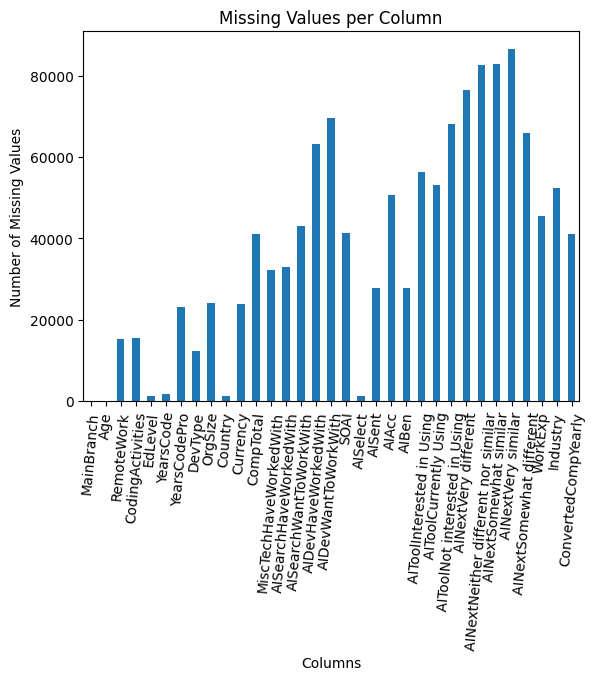

In [ ]:
(
    df
      .isnull()
      .sum()
      .plot.bar()
)

plt.xticks(rotation=85)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.show()

<Axes: >

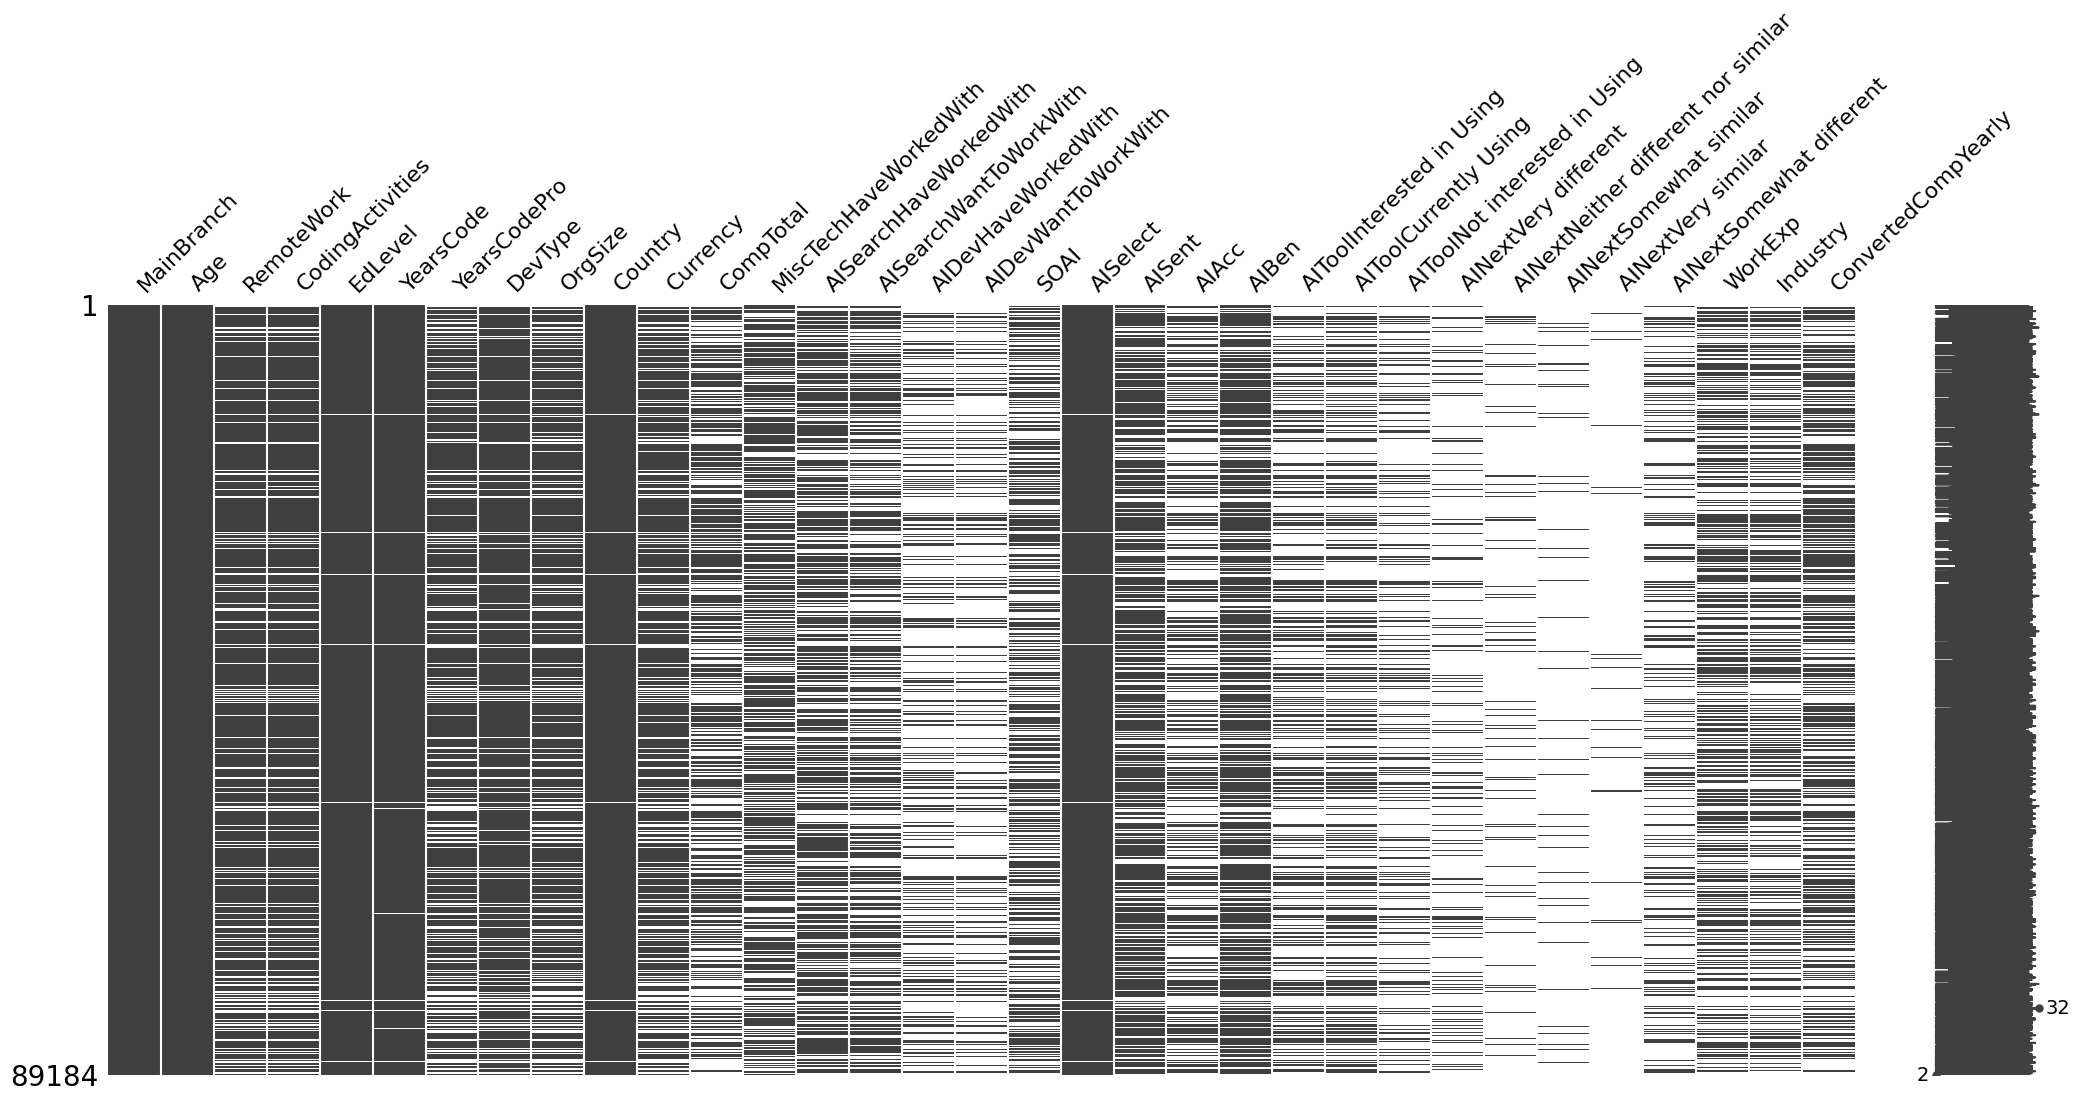

In [ ]:
msno.matrix(df)

In [ ]:
(
    df
      .isna()
      .sum()
)

MainBranch                                 0
Age                                        0
RemoteWork                             15374
CodingActivities                       15420
EdLevel                                 1211
YearsCode                               1749
YearsCodePro                           23048
DevType                                12312
OrgSize                                24141
Country                                 1211
Currency                               23850
CompTotal                              40959
MiscTechHaveWorkedWith                 32165
AISearchHaveWorkedWith                 32856
AISearchWantToWorkWith                 43034
AIDevHaveWorkedWith                    63280
AIDevWantToWorkWith                    69597
SOAI                                   41326
AISelect                                1211
AISent                                 27683
AIAcc                                  50590
AIBen                                  27788
AIToolInte

<Axes: >

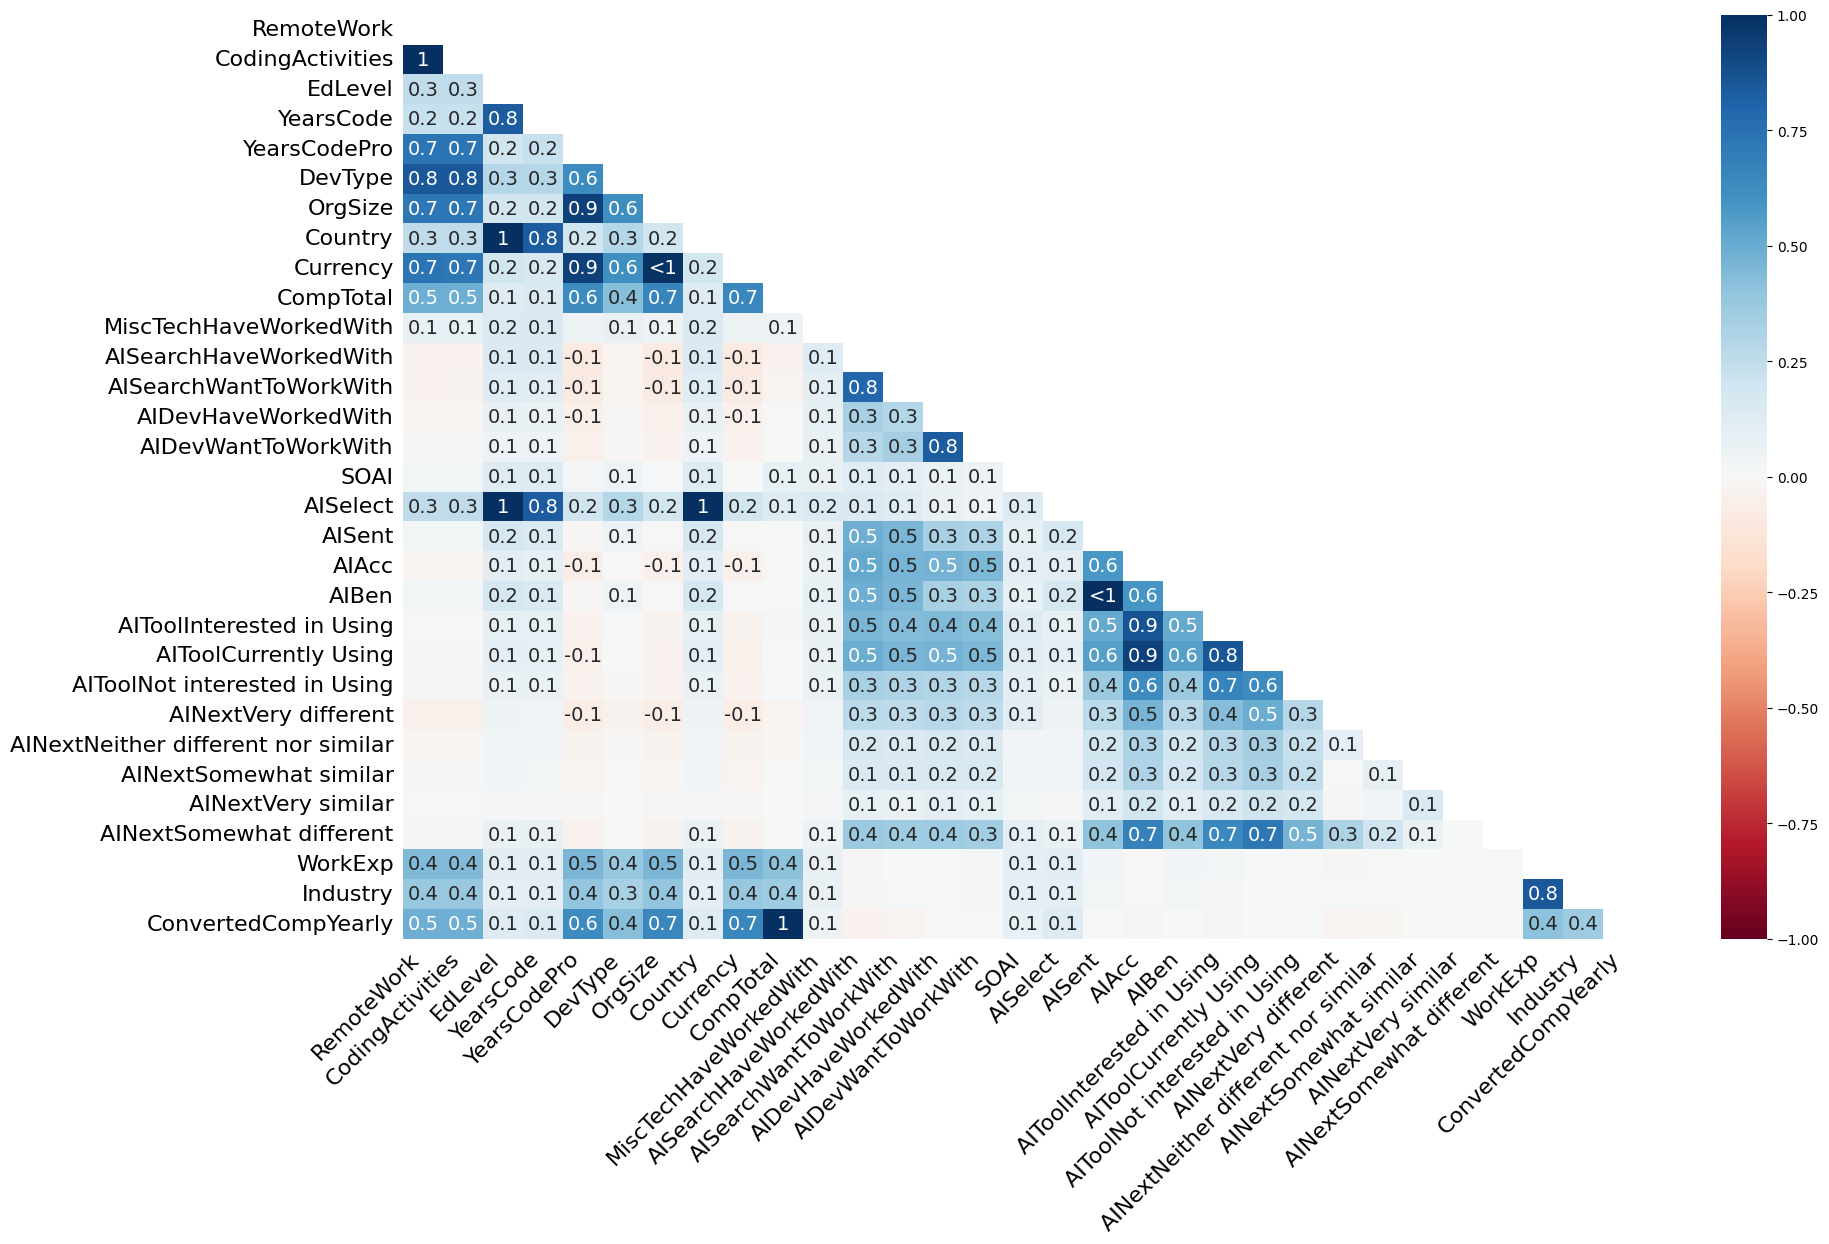

In [ ]:
msno.heatmap(df)

**What is the Nullity Correlation?**

The missingno library provides a function called missingno.nullity_correlation() that calculates and visualizes the nullity correlation between different columns of a DataFrame. Nullity correlation measures the association between missing values in different columns. It returns a matrix where each cell represents the nullity correlation coefficient between two columns.

The nullity correlation coefficient ranges from -1 to 1:

- 1 indicates a perfect positive correlation, meaning that if one column has a missing value, the other column is guaranteed to have a missing value as well.
- -1 indicates a perfect negative correlation, meaning that if one column has a missing value, the other column is guaranteed to be non-missing.
- 0 indicates no correlation between missing values in the two columns.

**Task 3** (moved so I can deal with nicer strings)

The variable names are a mess lets clean then up to make them 'pythonic'

In [1]:
cols = df.columns
newcols = {}
for col in cols:
  print(col)
  newcols.update({col : col.replace(" ", "")})
df.rename(columns=newcols, inplace=True)
df.info()

NameError: name 'df' is not defined

**Task 2** (moved so I can do this with nicer strings)

How should we treat these missing values, and why?

In [ ]:
print(df.size)
df.dropna(subset=["AIToolInterestedinUsing", "AIToolCurrentlyUsing", "AIToolNotinterestedinUsing"], how='all', inplace=True)
print(df.size)

2943072
1244496


Drop all responses that do not specify if they do or do not use AI tools, if they do not use AI tools or wont specify if they are interested their other responses are not valuable in this context

**Task 4**

Let us understand what the 'valid' values for each variable are and make sure that there are no weird/outlier values. If there are such values what should we do, why? and carry out the treatment.

In [ ]:
#print(df["ConvertedCompYearly"])
comps = df["ConvertedCompYearly"].dropna()
comps = np.where((comps > 20000) & (comps < 1000000))
print(max(comps[0]))
#for line in comps:
#  print(line)

20344


**Task 5**

Some of the columns may need to be cleaned. That is each column should have just one variable. Examine each column and clean up the ones that need cleaning.

In [ ]:
for col in df:
  print("\n", col, "\n")
  print(df[col].unique())

#Clean:
#CodingActivities (one hot)
#YearsCode (group years into ranges)
#YearsCodePro (group years into ranges)
#CompTotal (group into ranges)
#MiscTechHaveWorkedWith and(one hot)
#AISearchHaveWorkedWith (one hot)
#AISearchWantToWorkWith (one hot)
#AIDevHaveWorkedWith (one hot)
#AIDevWantToWorkWith (one hot)
#SOAI (drop)
#AIAcc (one hot)
#AIBen (one hot)
#AIToolInterestedinUsing (one hot)
#AIToolCurrentlyUsing (one hot)
#AIToolNotinterestedinUsing (one hot)
#AINextVeryDifferent (one hot)
#AINeitherdifferentnorsimilar (one hot, possibly drop)
#AINextSomewhatsimilar (one hot)
#AINextVerysimilar (one hot)
#AINextSomewhatdifferent (one hot)
#WorkExp (group into ranges)
#ConvertedCompYearly (group into ranges)


 MainBranch 

<ArrowExtensionArray>
[                                                       'I am a developer by profession',
 'I am not primarily a developer, but I write code sometimes as part of my work/studies',
                                                                 'I am learning to code',
                                                           'I code primarily as a hobby',
                              'I used to be a developer by profession, but no longer am']
Length: 5, dtype: string[pyarrow]

 Age 

<ArrowExtensionArray>
[   '25-34 years old',    '35-44 years old',    '45-54 years old',
 'Under 18 years old',    '55-64 years old',    '18-24 years old',
  '65 years or older',  'Prefer not to say']
Length: 8, dtype: string[pyarrow]

 RemoteWork 

<ArrowExtensionArray>
['Remote', 'Hybrid (some remote, some in-person)', <NA>, 'In-person']
Length: 4, dtype: string[pyarrow]

 CodingActivities 

<ArrowExtensionArray>
[                                                   